# Projeto 2

## Análise de dados para varejo
### Carregando dados

In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
# carrega dataset
df_dsa=pd.read_csv('dados/dataset.csv')
# shape
df_dsa.shape

(9700, 11)

In [5]:
# amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
# amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise exploratória

In [88]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [89]:
# verificando tipo de dados das colunas
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [90]:
# resumo estatístico da coluna valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [91]:
# Verificar registro duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [92]:
# verifica se há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [93]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Pergunta 1
#### Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

In [94]:
# filtramos o dataframe com os registros da categoria
df_dsa_pl = df_dsa[df_dsa['Categoria']=='Office Supplies']

In [95]:
df_dsa_pl

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900
...,...,...,...,...,...,...,...,...,...,...,...
9693,CA-2015-144281,10/06/2015,HK-14890,Corporate,United States,Detroit,Michigan,OFF-LA-10003930,Office Supplies,Labels,491.550
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620


In [96]:
# agrupando por cidade e calculando o total de valor_venda
df_dsa_pl_total = df_dsa_pl.groupby('Cidade')['Valor_Venda'].sum()

In [97]:
# verifica a cidade com maior valor
cid_maior_venda = df_dsa_pl_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cid_maior_venda)

Cidade com maior valor de venda para 'Office Supplies': New York City


In [98]:
# conferindo o resultado
df_dsa_pl_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

### Pergunta 2
#### Qual o total de vendas por data do pedido?
###### Demonstre o resultado através de um gráfico de barras.

In [99]:
# calculamos o total de vendas para cada data de pedido
df_dsa_p2=df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
df_dsa_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

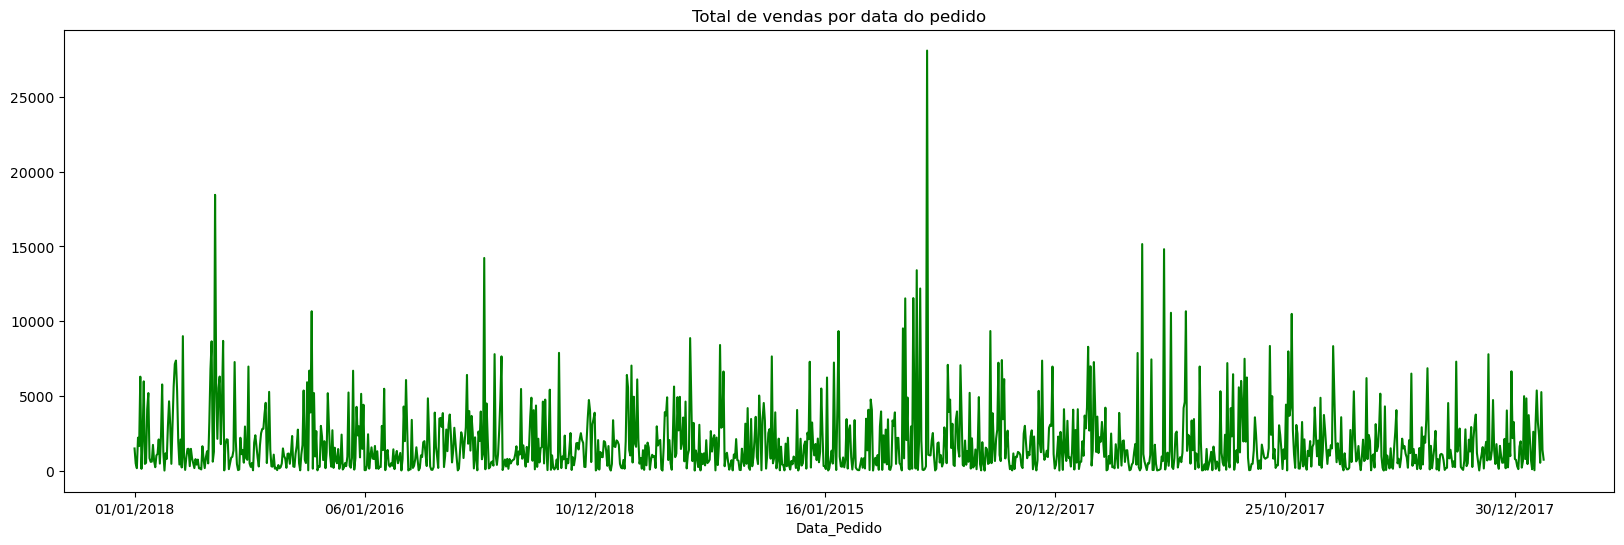

In [100]:
# plot
plt.figure(figsize=(20,6))
df_dsa_p2.plot(x='Data_Pedido', y='Valor_Venda', color='green')
plt.title('Total de vendas por data do pedido')
plt.show()

### Pergunta 3
#### Qual o total de vendas por Estado?
###### Demonstre o resultado através de um gráfico de barras.

In [101]:
# calculamos o total de vendas para cada Estado
df_dsa_p3=df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()
# cria um indice novo ordenado.
df_dsa_p3.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


<Figure size 2000x1000 with 0 Axes>

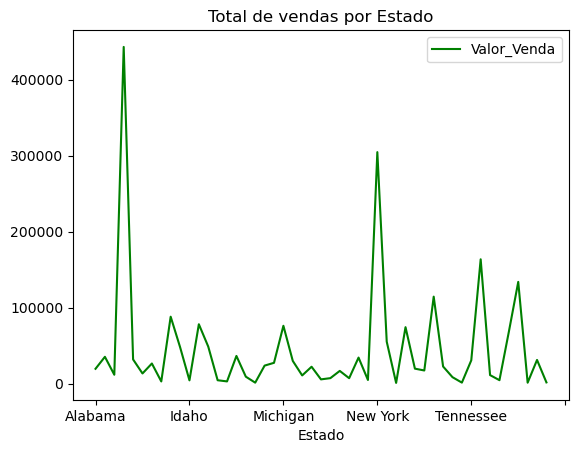

In [102]:
# plot
plt.figure(figsize=(20,10))
df_dsa_p3.plot(x='Estado', y='Valor_Venda', color='green')
plt.title('Total de vendas por Estado')
plt.show()

In [103]:
df_dsa_p3

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


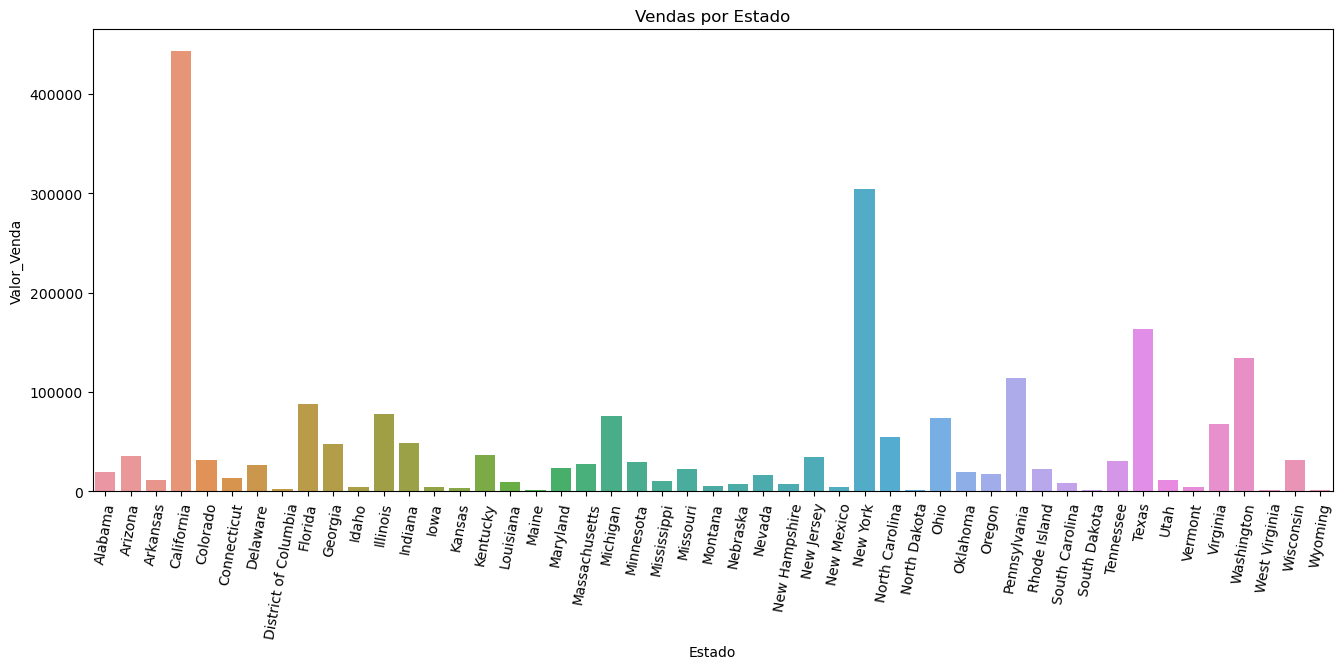

In [104]:
# Outra forma de gráfico
plt.figure(figsize=(16,6))
sns.barplot(data=df_dsa_p3,
            y='Valor_Venda',
            x='Estado').set(title='Vendas por Estado')
plt.xticks(rotation=80)
plt.show()

In [105]:
df_dsa_p3s=df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)

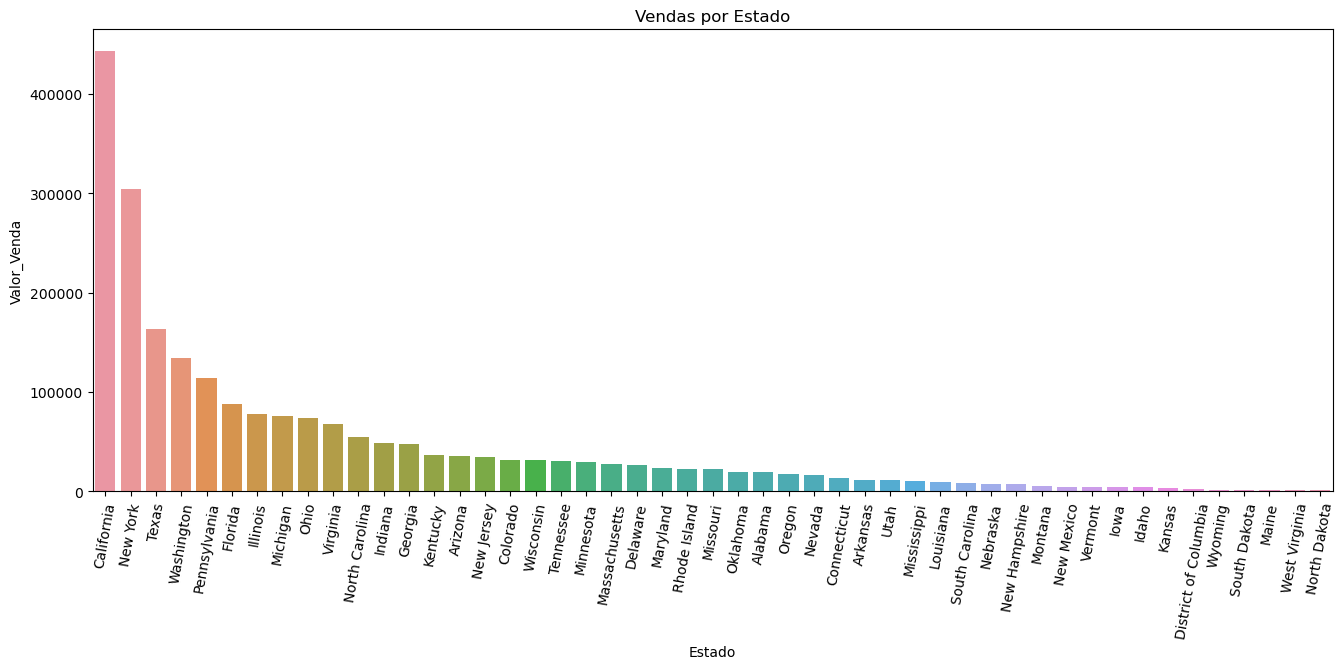

In [106]:
# Outra forma de gráfico
plt.figure(figsize=(16,6))
sns.barplot(data=df_dsa_p3s,
            y='Valor_Venda',
            x='Estado').set(title='Vendas por Estado')
plt.xticks(rotation=80)
plt.show()

### Pergunta 4
#### 10 cidade com maior total de vendas?
###### Demonstre o resultado através de um gráfico de barras.

In [107]:
# Agrupar por cidade, calcular o total de vendas e ordenar, listando somente os 10 primeiro registros
df_dsa_p4=df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(10)

In [108]:
df_dsa_p4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


[Text(0.5, 1.0, 'As 10 cidade com maior total de vendas')]

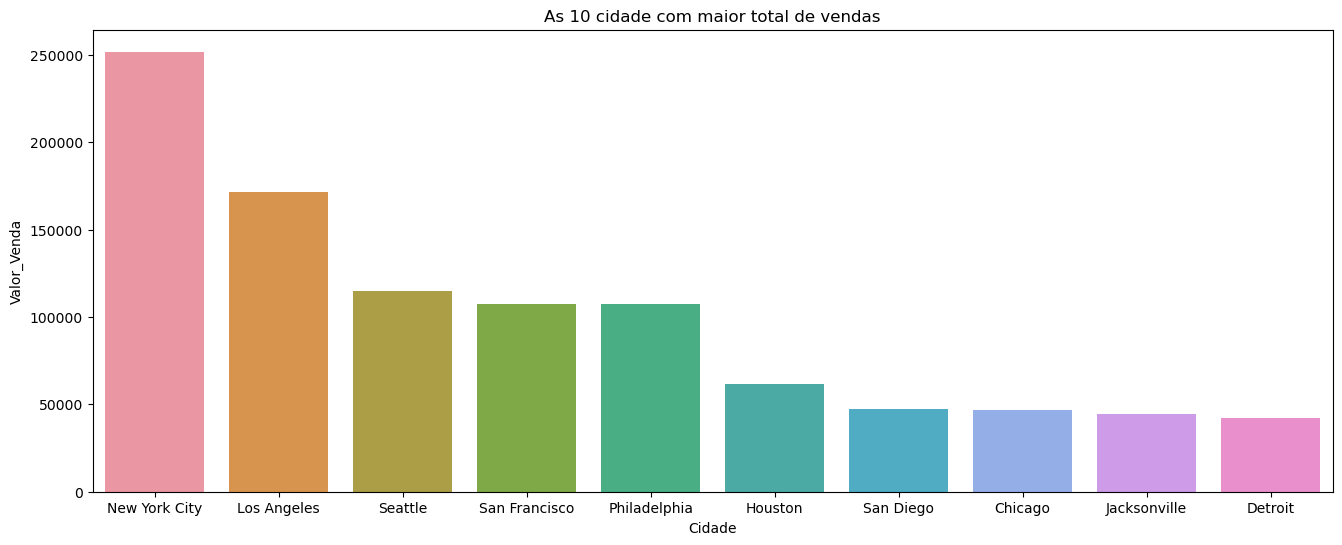

In [109]:
# plot
plt.figure(figsize=(16,6))
sns.set_palette('coolwarm')
sns.barplot(data=df_dsa_p4,
            y='Valor_Venda',
            x='Cidade').set(title='As 10 cidade com maior total de vendas')

### Pergunta 5
#### Qual o segmento teve o maior total de vendas?
###### Demonstre o resultado através de um gráfico de pizza.

In [110]:
# Agrupamos por segmento e calculamos o total de vendas
df_dsa_p5=df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)
# Imprimindo valores ordenados
df_dsa_p5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [111]:
# Convertendo em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total=sum(values)
        val=int(round(pct*total/100.0))
        return '$ {v:d}'.format(v=val)
    return my_format

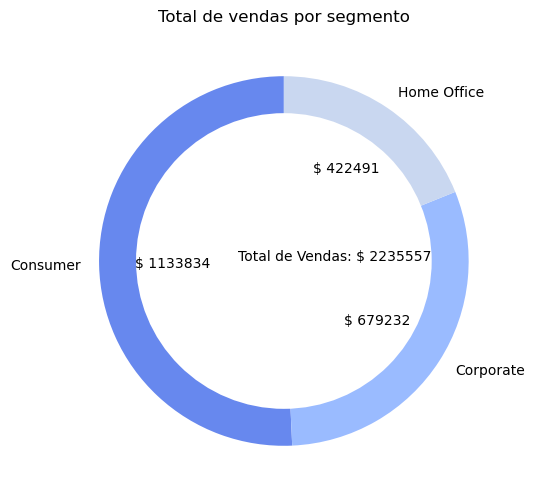

In [112]:
# plot
# tamanho figura
plt.figure(figsize=(16,6))

# gráfico de pizza
plt.pie(df_dsa_p5['Valor_Venda'],
        labels=df_dsa_p5['Segmento'],
        autopct=autopct_format(df_dsa_p5['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

# labels e anotações
plt.annotate(text='Total de Vendas: '+'$ '+str(int(sum(df_dsa_p5['Valor_Venda']))), xy=(-0.25,0))
plt.title('Total de vendas por segmento')
plt.show()

([<matplotlib.patches.Wedge at 0x1a5ab2b7d50>,
 [Text(-1.2996691248858703, -0.029328583641162857, 'Consumer'),
  Text(0.9254031518271633, -0.5946671393211098, 'Corporate'),
  Text(0.6153932956153919, 0.9117516612058499, 'Home Office')],
 [Text(-0.7997963845451509, -0.018048359163792528, '50.72%'),
  Text(0.504765355542089, -0.32436389417515077, '30.38%'),
  Text(0.3356690703356683, 0.49731908793046353, '18.90%')])

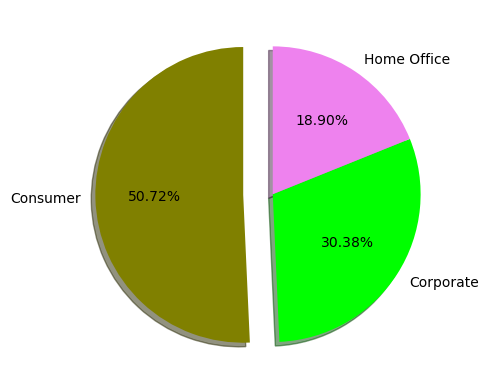

In [113]:
indice_maior = df_dsa_p5['Valor_Venda'].idxmax()
explode = [0.2 if i == indice_maior else 0 for i in df_dsa_p5.index]
cores = ['olive', 'lime', 'violet']
plt.pie(df_dsa_p5['Valor_Venda'], labels=df_dsa_p5['Segmento'], colors=cores, startangle=90, shadow=True, explode=explode, autopct='%2.2f%%')


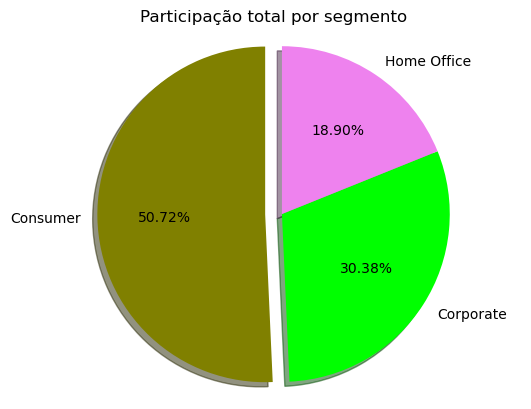

In [114]:
indice_maior = df_dsa_p5['Valor_Venda'].idxmax()
explode = [0.1 if i == indice_maior else 0 for i in df_dsa_p5.index]
cores = ['olive', 'lime', 'violet']
plt.pie(df_dsa_p5['Valor_Venda'], labels=df_dsa_p5['Segmento'], colors=cores, startangle=90, shadow=True, explode=explode, autopct='%2.2f%%')
plt.axis('equal')
plt.title('Participação total por segmento')
plt.show()

### Pergunta 6 (Desafio nível baby)
#### O total de vendas por segmento e por ano?


In [115]:
# convertemos a coluna data para tipo datetime para obter o formato adequado
df_dsa['Data_Pedido']=pd.to_datetime(df_dsa['Data_Pedido'],dayfirst=True)
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [116]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [117]:
# extraindo o ano criando nova variável
df_dsa['Ano']=df_dsa['Data_Pedido'].dt.year
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [120]:
# total de vendas por segmento e por ano
df_dsa_p6 = df_dsa.groupby(['Ano','Segmento'])['Valor_Venda'].sum()

In [123]:
df_dsa_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

### Pergunta 7 (Desafio nível júnior)
#### Os gestores gostariam de simular faixas de descontos conforme abaixo:
###### Se o Valor_Venda for maior que 1000 recebe 15% de desconto
###### Se o valor_Venda for menor que 1000 recebe 10% de desconto

#### Quantas vendas receberiam 15% de desconto?

In [124]:
# cria uma nova coluna de acordo com a regra definida
df_dsa['Desconto']=np.where(df_dsa['Valor_Venda']>1000, 0.15, 0.10)
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [126]:
# total por cada valor de variável
df_dsa['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [127]:
print('No total 457 vendas recebiriam descontos de 15%.')

No total 457 vendas recebiriam descontos de 15%.


### Pergunta 8 (Desafio nível Master)
#### Considere o desconto de 15%. Qual seria a média do valor de venda antes e depois do desconto?

In [132]:
# Criamos uma coluna calculando o valor de venda menos o desconto
df_dsa['Valor_Venda_Desc']=df_dsa['Valor_Venda']-(df_dsa['Valor_Venda']*df_dsa['Desconto'])
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desc
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [135]:
# filtrando as vendas antes do desconto de 15%
df_dsa_p8_antes_desc = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

# filtrando as vendas após o desconto de 15%
df_dsa_p8_apos_desc=df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desc']

# calcula média de vendas antes do desconto de 15%
media_vendas_antes_desc=df_dsa_p8_antes_desc.mean()

# calcula média de vendas após o desconto de 15%
media_vendas_apos_desc=df_dsa_p8_apos_desc.mean()

In [138]:
print('Média das vendas antes do desconto de 15%:', round(media_vendas_antes_desc,2))
print('Média das vendas após o desconto de 15%:', round(media_vendas_apos_desc,2))

Média das vendas antes do desconto de 15%: 2116.81
Média das vendas após o desconto de 15%: 1799.29


### Pergunta 9 (Desafio nível Master Ninja)
#### Qual a média de vendas por segmento, por ano e por mês?
###### Demonstre o resultado através de gráfico de linha
##### https://seaborn.pydata.org/generated/seaborn.re/plot.html

In [139]:
# estraímos o mês e gravamos em uma nova variável
df_dsa['Mes']=df_dsa['Data_Pedido'].dt.month

In [141]:
# agrupanos por ano, mês e segmento e calculamos estatísticas de agregação
df_dsa_p9=df_dsa.groupby(['Ano','Mes','Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
df_dsa_p9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [143]:
# Extraindo os níveis
anos=df_dsa_p9.index.get_level_values(0)
meses=df_dsa_p9.index.get_level_values(1)
segmentos=df_dsa_p9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

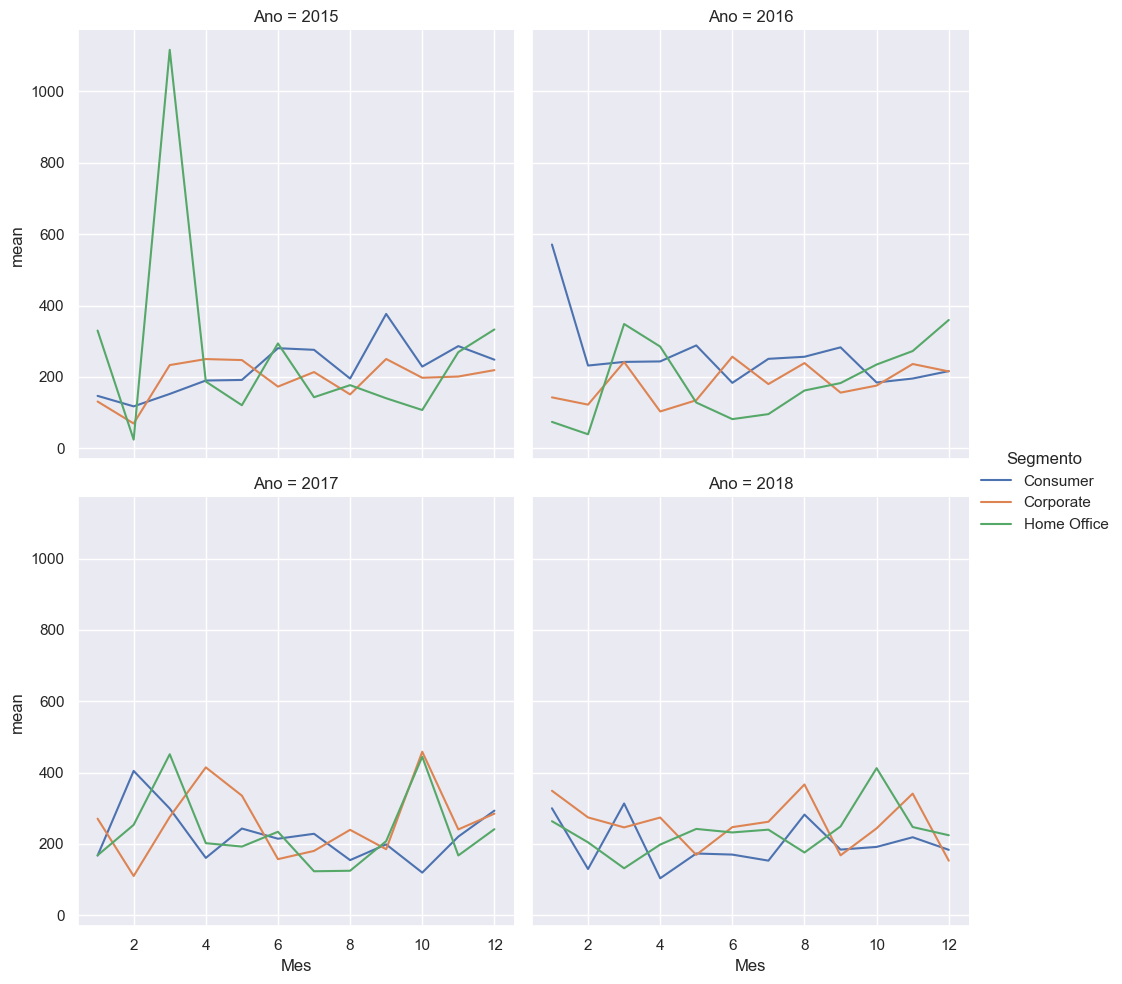

In [147]:
# plot
plt.figure(figsize=(12,6))
sns.set()
figl = sns.relplot(kind ='line',
                   data=df_dsa_p9,
                   y='mean',
                   x=meses,
                   hue=segmentos,
                   col=anos,
                   col_wrap=2)
plt.show()

<Figure size 1200x600 with 0 Axes>

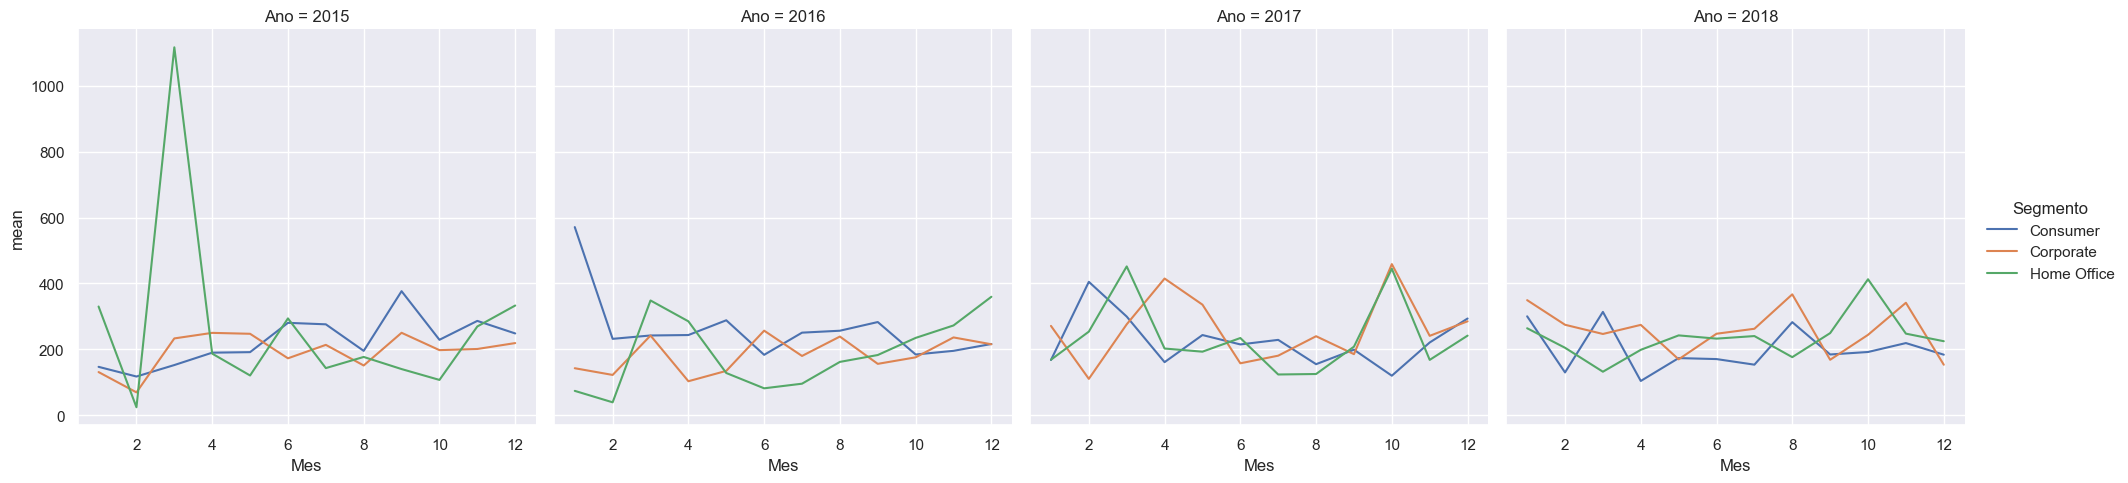

In [148]:
# plot
plt.figure(figsize=(12,6))
sns.set()
figl = sns.relplot(kind ='line',
                   data=df_dsa_p9,
                   y='mean',
                   x=meses,
                   hue=segmentos,
                   col=anos,
                   col_wrap=4)
plt.show()

### Pergunta 10 (Desafio nível Master Ninja das Galáxias)
#### Qual o total de vendas por categoria e subcategoria, considerando somente as top 12 subcategorias?
###### Demonstre tudo através de um único gráfico

In [149]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desc,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [ ]:
# agrupamos por categoria e subcategoria, calculando a soma somente para variáveis numéricas
df_dsa_p10 = df_dsa.groupby(['Categoria','SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',ascending = False).head(12)

In [152]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_dsa_p10 = df_dsa_p10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [153]:
# Dataframe com categorias e subcategorias
df_dsa_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [157]:
# Criamos outro dataframe somente com os totais por categoria
df_dsa_p10_cat = df_dsa_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [158]:
df_dsa_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [ ]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [161]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

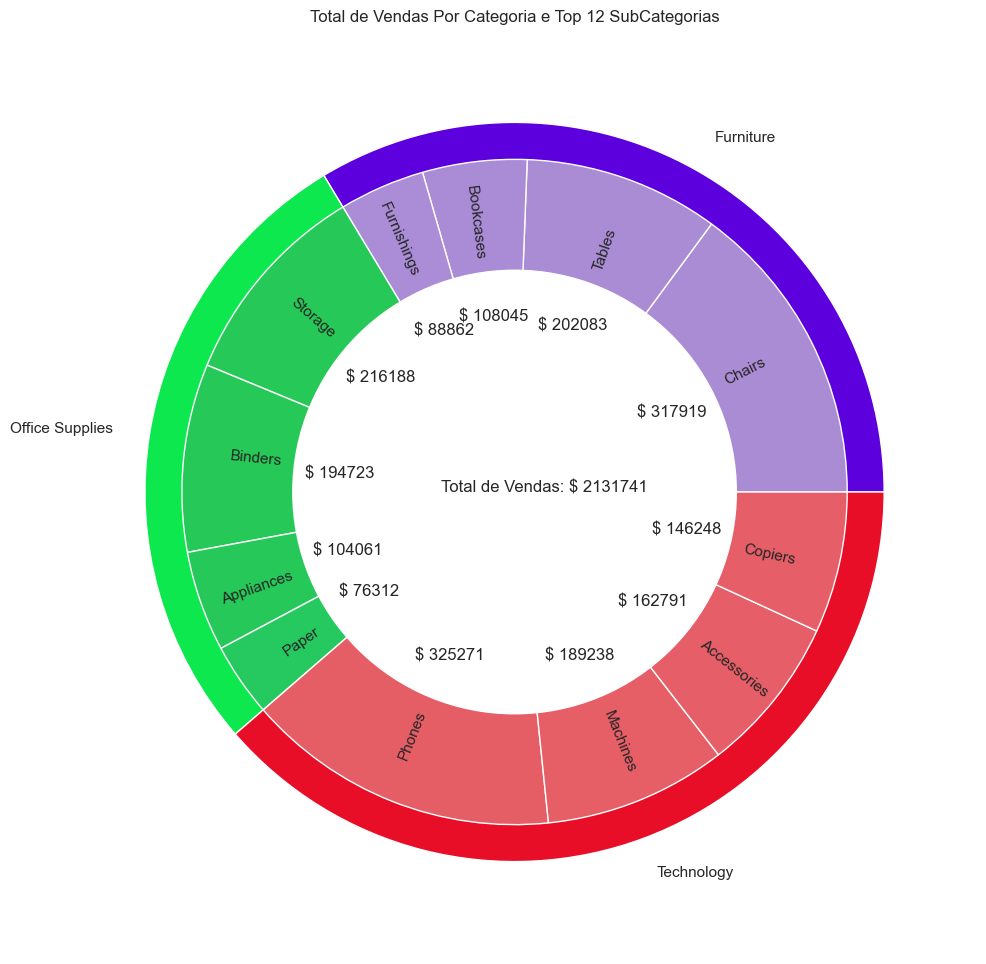

In [164]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
pl = ax.pie(df_dsa_p10_cat['Valor_Venda'],
            radius = 1,
            labels = df_dsa_p10_cat['Categoria' ],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_p10['Valor_Venda'],
            radius = 0.9,
            labels = df_dsa_p10['SubCategoria'],
            autopct= autopct_format(df_dsa_p10['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Valor_Venda']) )), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

#### Pandas
#### https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html
#### NumPy
#### https://numpy.org/devdocs/user/index.html
#### Matplotlib
#### https://matplotlib.org/stable/users/index.html
#### Seaborn
#### https://seaborn.pydata.org/Data

